In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Project paths
PROJECT_ROOT = Path(r"C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting")

DATA_DIR   = PROJECT_ROOT / "data"
OUTPUT_DIR = PROJECT_ROOT / "output" / "clean"
IMAGES_DIR = PROJECT_ROOT / "images"

IMAGES_DIR.mkdir(parents=True, exist_ok=True)

print("PROJECT_ROOT:", PROJECT_ROOT)
print("OUTPUT_DIR: ", OUTPUT_DIR)
print("IMAGES_DIR: ", IMAGES_DIR)


PROJECT_ROOT: C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting
OUTPUT_DIR:  C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\output\clean
IMAGES_DIR:  C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\images


In [2]:
delta_all_path = OUTPUT_DIR / "delta_all_hubs.csv"
print("Loading:", delta_all_path)

df_delta = pd.read_csv(delta_all_path)
df_delta["date"] = pd.to_datetime(df_delta["date"])

print(df_delta.head())
print("\nAirports in dataset:", df_delta["airport"].unique())


Loading: C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\output\clean\delta_all_hubs.csv
        date  asm_domestic  asm_international  flights_domestic  \
0 2002-10-01       2093602           887184.0             16535   
1 2002-11-01       1999098           823130.0             15658   
2 2002-12-01       2057104           783201.0             16038   
3 2003-01-01       2068740           780766.0             16316   
4 2003-02-01       1798127           633201.0             14080   

   flights_international  passengers_domestic  passengers_international  \
0                 1357.0              2120947                  176671.0   
1                 1301.0              1993739                  172111.0   
2                 1298.0              2159529                  183952.0   
3                 1301.0              1880538                  169462.0   
4                 1104.0              1776826                  143114.0 

In [3]:
summary = (
    df_delta
    .groupby("airport")["pax"]
    .agg(["min", "max", "mean", "sum", "count"])
    .round(0)
    .rename(columns={
        "min": "min_pax",
        "max": "max_pax",
        "mean": "avg_pax",
        "sum": "total_pax",
        "count": "months"
    })
)

summary


KeyError: 'Column not found: pax'

In [5]:
# Quick check: what columns do we actually have?
print("df_delta columns:", df_delta.columns.tolist())
display(df_delta.head())

# Detect the passenger column name automatically
passenger_candidates = [
    "pax",
    "passengers",
    "Passengers",
    "passenger",
    "Passenger"
]

passenger_col = None
for cand in passenger_candidates:
    if cand in df_delta.columns:
        passenger_col = cand
        break

if passenger_col is None:
    raise ValueError("Could not find passenger column in df_delta. Check column names above.")

print(f"\nUsing passenger column: {passenger_col}")

summary = (
    df_delta
    .groupby("airport")[passenger_col]
    .agg(["min", "max", "mean", "sum", "count"])
    .round(0)
    .rename(columns={
        "min": "min_pax",
        "max": "max_pax",
        "mean": "avg_pax",
        "sum": "total_pax",
        "count": "months"
    })
)

summary


df_delta columns: ['date', 'asm_domestic', 'asm_international', 'flights_domestic', 'flights_international', 'passengers_domestic', 'passengers_international', 'rpm_domestic', 'rpm_international', 'airport']


,date,asm_domestic,asm_international,flights_domestic,flights_international,passengers_domestic,passengers_international,rpm_domestic,rpm_international,airport
0,2002-10-01,2093602,887184.0,16535,1357.0,2120947,176671.0,1527419,597313.0,ATL
1,2002-11-01,1999098,823130.0,15658,1301.0,1993739,172111.0,1434927,566487.0,ATL
2,2002-12-01,2057104,783201.0,16038,1298.0,2159529,183952.0,1615439,579713.0,ATL
3,2003-01-01,2068740,780766.0,16316,1301.0,1880538,169462.0,1409105,536961.0,ATL
4,2003-02-01,1798127,633201.0,14080,1104.0,1776826,143114.0,1307159,431583.0,ATL


ValueError: Could not find passenger column in df_delta. Check column names above.

In [6]:
print(df_delta.columns.tolist())
df_delta.head()


['date', 'asm_domestic', 'asm_international', 'flights_domestic', 'flights_international', 'passengers_domestic', 'passengers_international', 'rpm_domestic', 'rpm_international', 'airport']


,date,asm_domestic,asm_international,flights_domestic,flights_international,passengers_domestic,passengers_international,rpm_domestic,rpm_international,airport
0,2002-10-01,2093602,887184.0,16535,1357.0,2120947,176671.0,1527419,597313.0,ATL
1,2002-11-01,1999098,823130.0,15658,1301.0,1993739,172111.0,1434927,566487.0,ATL
2,2002-12-01,2057104,783201.0,16038,1298.0,2159529,183952.0,1615439,579713.0,ATL
3,2003-01-01,2068740,780766.0,16316,1301.0,1880538,169462.0,1409105,536961.0,ATL
4,2003-02-01,1798127,633201.0,14080,1104.0,1776826,143114.0,1307159,431583.0,ATL


In [7]:
df_delta["pax"] = df_delta["passengers_domestic"] + df_delta["passengers_international"]


In [8]:
# Add total passenger column
df_delta["pax"] = df_delta["passengers_domestic"] + df_delta["passengers_international"]

# Summary
summary = (
    df_delta
    .groupby("airport")["pax"]
    .agg(["min", "max", "mean", "sum", "count"])
    .round(0)
    .rename(columns={
        "min": "min_pax",
        "max": "max_pax",
        "mean": "avg_pax",
        "sum": "total_pax",
        "count": "months"
    })
)

summary


,min_pax,max_pax,avg_pax,total_pax,months
airport,,,,,
ATL,1662515.0,3357028.0,2393061.0,409213497.0,171
DTW,12848.0,788298.0,471305.0,55614048.0,118
MSP,18232.0,940830.0,612220.0,59997602.0,98


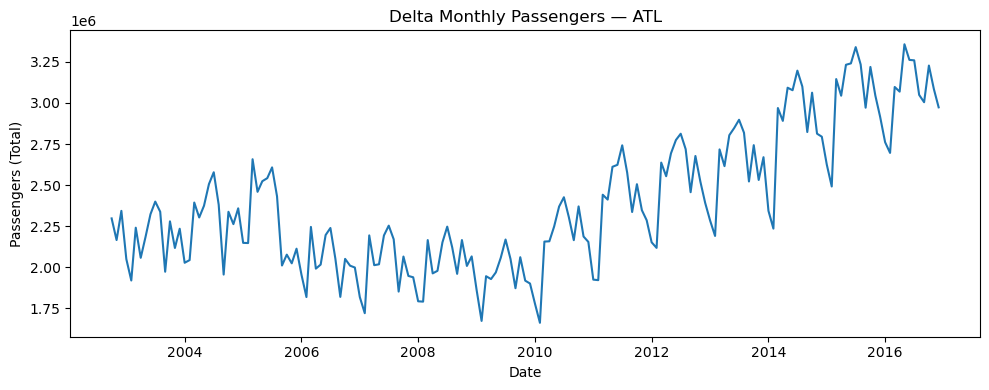

Saved: C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\images\atl\ATL_delta_passengers_timeseries.png


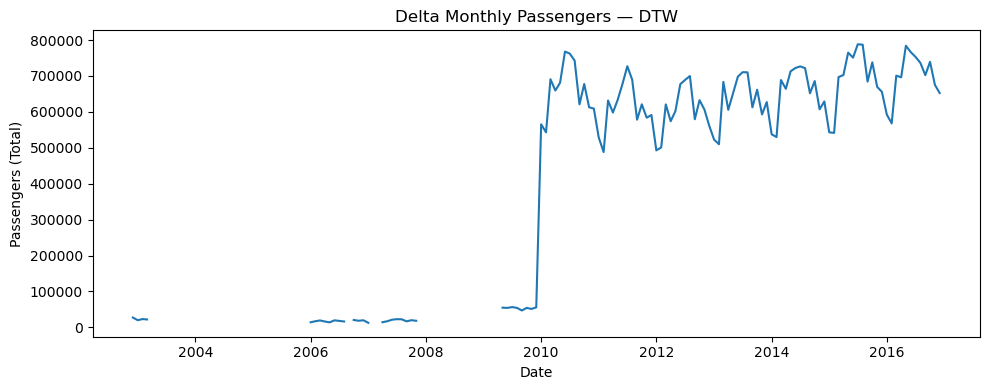

Saved: C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\images\dtw\DTW_delta_passengers_timeseries.png


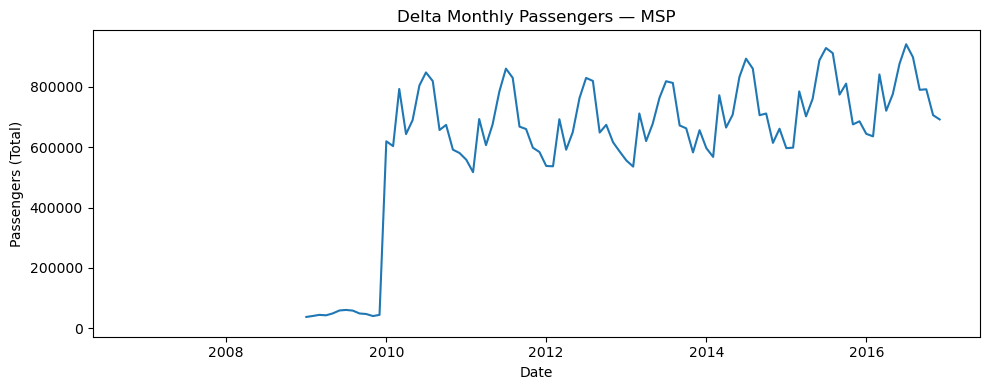

Saved: C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\images\msp\MSP_delta_passengers_timeseries.png


In [9]:
airports = ["ATL", "DTW", "MSP"]

for ap in airports:
    dfa = df_delta[df_delta["airport"] == ap].copy()

    # Add total pax column (in case)
    dfa["pax"] = dfa["passengers_domestic"] + dfa["passengers_international"]

    plt.figure(figsize=(10, 4))
    plt.plot(dfa["date"], dfa["pax"])
    plt.title(f"Delta Monthly Passengers — {ap}")
    plt.xlabel("Date")
    plt.ylabel("Passengers (Total)")
    plt.tight_layout()

    ap_img_dir = IMAGES_DIR / ap.lower()
    ap_img_dir.mkdir(parents=True, exist_ok=True)
    out_path = ap_img_dir / f"{ap}_delta_passengers_timeseries.png"
    plt.savefig(out_path, dpi=300)
    plt.show()

    print("Saved:", out_path)


In [10]:
# Folder: airports_all_airlines
AIRPORTS_ALL_DIR = DATA_DIR / "airports_all_airlines"

airports = ["ATL", "DTW", "MSP"]

raw_airport_data = {}

for ap in airports:
    f = AIRPORTS_ALL_DIR / f"all_airlines-{ap}.csv"
    print(f"Loading {ap}:", f.exists(), f)
    df = pd.read_csv(f)
    df.columns = [c.lower() for c in df.columns]
    raw_airport_data[ap] = df

raw_airport_data["ATL"].head()


Loading ATL: True C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\data\airports_all_airlines\all_airlines-ATL.csv
Loading DTW: True C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\data\airports_all_airlines\all_airlines-DTW.csv
Loading MSP: True C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\data\airports_all_airlines\all_airlines-MSP.csv


,date,asm_domestic,asm_international,flights_domestic,flights_international,passengers_domestic,passengers_international,rpm_domestic,rpm_international
0,2002-10-01,2824495,1195044.0,33127,2225.0,2996724,245186.0,2013396,809409.0
1,2002-11-01,2679971,1123049.0,31504,2227.0,2826112,237832.0,1890579,766606.0
2,2002-12-01,2762865,1093904.0,32371,2302.0,3085834,257836.0,2134968,809230.0
3,2003-01-01,2794855,1089678.0,33041,2304.0,2686976,234276.0,1858455,736141.0
4,2003-02-01,2458733,904631.0,29104,1956.0,2554385,199800.0,1738958,602275.0


In [12]:
import pandas as pd

def reshape_airport_df(df):
    # Identify date column
    date_col = "month" if "month" in df.columns else "date"

    df[date_col] = pd.to_datetime(df[date_col])

    id_vars = [date_col]
    value_vars = [c for c in df.columns if c not in id_vars]

    df_long = df.melt(
        id_vars=id_vars,
        value_vars=value_vars,
        var_name="airline",
        value_name="pax"
    )

    # Clean airline names
    df_long["airline"] = df_long["airline"].str.replace("_", "").str.upper()

    return df_long


In [13]:
airport_market = {}

for ap in airports:
    df_raw = raw_airport_data[ap]
    df_long = reshape_airport_df(df_raw)
    
    # Replace nulls with 0
    df_long["pax"] = df_long["pax"].fillna(0)
    
    # Identify Delta and Others
    df_long["group"] = df_long["airline"].apply(lambda x: "DELTA" if x == "DL" else "OTHERS")
    
    airport_market[ap] = df_long

airport_market["ATL"].head()


,date,airline,pax,group
0,2002-10-01,ASMDOMESTIC,2824495.0,OTHERS
1,2002-11-01,ASMDOMESTIC,2679971.0,OTHERS
2,2002-12-01,ASMDOMESTIC,2762865.0,OTHERS
3,2003-01-01,ASMDOMESTIC,2794855.0,OTHERS
4,2003-02-01,ASMDOMESTIC,2458733.0,OTHERS


In [14]:
import matplotlib.pyplot as plt

for ap in airports:
    df = airport_market[ap]
    
    grouped = (
        df.groupby(["date", "group"])["pax"]
        .sum()
        .reset_index()
    )

    pivot = grouped.pivot(index="date", columns="group", values="pax").fillna(0)

    plt.figure(figsize=(10, 4))
    plt.plot(pivot.index, pivot["DELTA"], label="Delta", linewidth=2)
    plt.plot(pivot.index, pivot["OTHERS"], label="All other airlines", linewidth=1.5)
    
    plt.title(f"Delta vs Others — {ap} Market Share")
    plt.ylabel("Passengers")
    plt.xlabel("Date")
    plt.legend()
    plt.tight_layout()

    # Save
    out_path = IMAGES_DIR / ap.lower() / f"{ap}_market_share.png"
    plt.savefig(out_path, dpi=300)
    plt.show()
    
    print("Saved:", out_path)


KeyError: 'DELTA'

<Figure size 1000x400 with 0 Axes>


=== ATL ===
Unique airline values (first 10):
['ASMDOMESTIC', 'ASMINTERNATIONAL', 'FLIGHTSDOMESTIC', 'FLIGHTSINTERNATIONAL', 'PASSENGERSDOMESTIC', 'PASSENGERSINTERNATIONAL', 'RPMDOMESTIC', 'RPMINTERNATIONAL']
Group counts:
group
OTHERS    1392
Name: count, dtype: int64
Pivot columns: ['OTHERS']


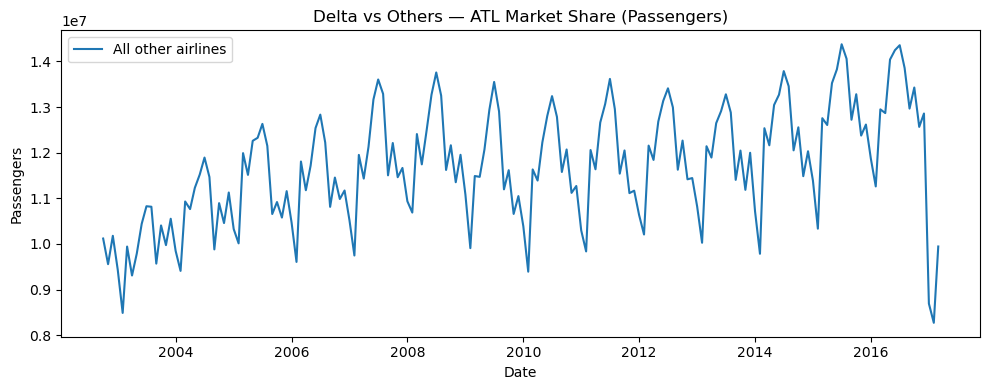

Saved: C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\images\atl\ATL_market_share.png

=== DTW ===
Unique airline values (first 10):
['ASMDOMESTIC', 'ASMINTERNATIONAL', 'FLIGHTSDOMESTIC', 'FLIGHTSINTERNATIONAL', 'PASSENGERSDOMESTIC', 'PASSENGERSINTERNATIONAL', 'RPMDOMESTIC', 'RPMINTERNATIONAL']
Group counts:
group
OTHERS    1392
Name: count, dtype: int64
Pivot columns: ['OTHERS']


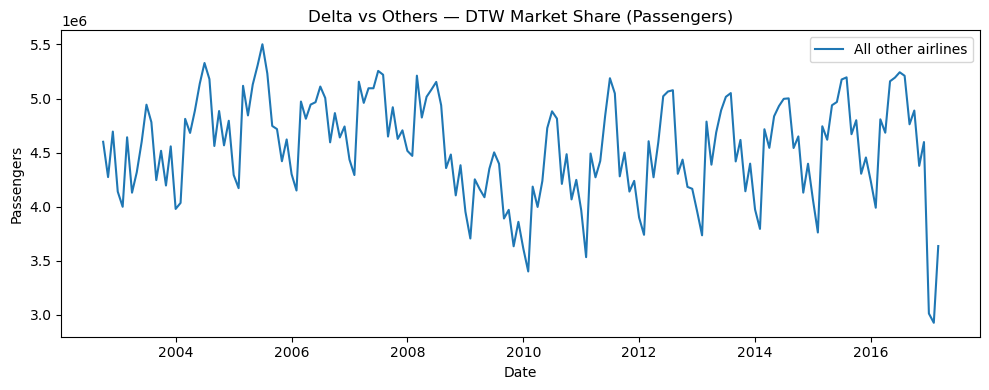

Saved: C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\images\dtw\DTW_market_share.png

=== MSP ===
Unique airline values (first 10):
['ASMDOMESTIC', 'ASMINTERNATIONAL', 'FLIGHTSDOMESTIC', 'FLIGHTSINTERNATIONAL', 'PASSENGERSDOMESTIC', 'PASSENGERSINTERNATIONAL', 'RPMDOMESTIC', 'RPMINTERNATIONAL']
Group counts:
group
OTHERS    1392
Name: count, dtype: int64
Pivot columns: ['OTHERS']


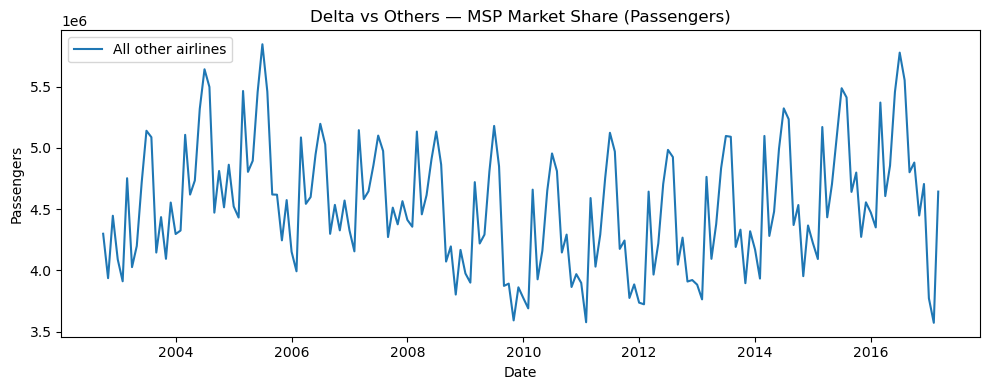

Saved: C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\images\msp\MSP_market_share.png


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

airports = ["ATL", "DTW", "MSP"]

airport_market = {}

def classify_airline_to_group(a: str) -> str:
    """
    Classify airline code/name into DELTA vs OTHERS, robustly.
    """
    a = str(a).upper()
    # Treat anything containing 'DL' or 'DELTA' as Delta
    if "DELTA" in a or a == "DL" or a.startswith("DL "):
        return "DELTA"
    return "OTHERS"

for ap in airports:
    print(f"\n=== {ap} ===")
    df_raw = raw_airport_data[ap].copy()
    df_long = reshape_airport_df(df_raw)
    
    # Replace nulls with 0
    df_long["pax"] = df_long["pax"].fillna(0)
    
    # Show sample of airline names for debugging
    print("Unique airline values (first 10):")
    print(df_long["airline"].drop_duplicates().sort_values().head(10).tolist())
    
    # Group classification
    df_long["group"] = df_long["airline"].apply(classify_airline_to_group)
    print("Group counts:")
    print(df_long["group"].value_counts())
    
    airport_market[ap] = df_long

    # Aggregate by date + group
    grouped = (
        df_long.groupby(["date", "group"])["pax"]
        .sum()
        .reset_index()
    )

    pivot = grouped.pivot(index="date", columns="group", values="pax").fillna(0)

    print("Pivot columns:", list(pivot.columns))

    plt.figure(figsize=(10, 4))

    # Plot Delta if present
    if "DELTA" in pivot.columns:
        plt.plot(pivot.index, pivot["DELTA"], label="Delta", linewidth=2)

    # Plot Others if present
    if "OTHERS" in pivot.columns:
        plt.plot(pivot.index, pivot["OTHERS"], label="All other airlines", linewidth=1.5)

    plt.title(f"Delta vs Others — {ap} Market Share (Passengers)")
    plt.ylabel("Passengers")
    plt.xlabel("Date")
    plt.legend()
    plt.tight_layout()

    out_path = IMAGES_DIR / ap.lower() / f"{ap}_market_share.png"
    plt.savefig(out_path, dpi=300)
    plt.show()

    print("Saved:", out_path)


In [16]:
def load_total_airport(ap):
    f = AIRPORTS_ALL_DIR / f"all_airlines-{ap}.csv"
    df = pd.read_csv(f)
    df.columns = [c.lower() for c in df.columns]

    # detect date column
    date_col = "month" if "month" in df.columns else "date"
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.rename(columns={date_col: "date"})

    # identify passenger columns
    passenger_cols = [c for c in df.columns if "passenger" in c]
    df["total_pax"] = df[passenger_cols].sum(axis=1)

    return df[["date", "total_pax"]]


In [17]:
market_data = {}

for ap in ["ATL", "DTW", "MSP"]:
    df_delta_ap = df_delta[df_delta["airport"] == ap].copy()
    df_delta_ap["delta_pax"] = df_delta_ap["passengers_domestic"] + df_delta_ap["passengers_international"]
    df_delta_ap = df_delta_ap[["date", "delta_pax"]]

    df_total_ap = load_total_airport(ap)

    df_merged = df_delta_ap.merge(df_total_ap, on="date", how="inner")
    df_merged["others_pax"] = df_merged["total_pax"] - df_merged["delta_pax"]
    df_merged["delta_share"] = df_merged["delta_pax"] / df_merged["total_pax"] * 100

    market_data[ap] = df_merged

    print(f"\n=== {ap} ===")
    display(df_merged.head())



=== ATL ===


,date,delta_pax,total_pax,others_pax,delta_share
0,2002-10-01,2297618.0,3241910.0,944292.0,70.872356
1,2002-11-01,2165850.0,3063944.0,898094.0,70.688302
2,2002-12-01,2343481.0,3343670.0,1000189.0,70.087090
3,2003-01-01,2050000.0,2921252.0,871252.0,70.175391
4,2003-02-01,1919940.0,2754185.0,834245.0,69.709914



=== DTW ===


,date,delta_pax,total_pax,others_pax,delta_share
0,2002-10-01,NaN,1307775.0,NaN,NaN
1,2002-11-01,NaN,1206176.0,NaN,NaN
2,2002-12-01,27504.0,1351271.0,1323767.0,2.035417
3,2003-01-01,20080.0,1098936.0,1078856.0,1.827222
4,2003-02-01,23234.0,1132201.0,1108967.0,2.052109



=== MSP ===


,date,delta_pax,total_pax,others_pax,delta_share
0,2002-10-01,NaN,1264912.0,NaN,NaN
1,2002-11-01,NaN,1133926.0,NaN,NaN
2,2002-12-01,NaN,1325907.0,NaN,NaN
3,2003-01-01,NaN,1144145.0,NaN,NaN
4,2003-02-01,NaN,1134892.0,NaN,NaN


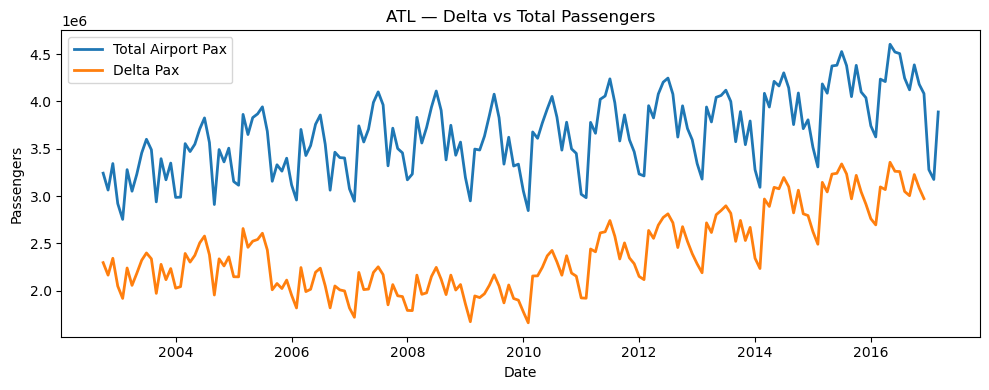

Saved: C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\images\atl\ATL_delta_vs_total.png


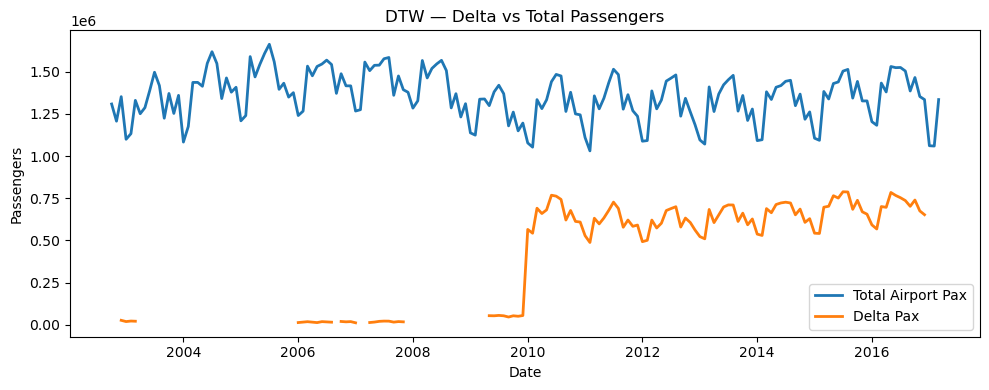

Saved: C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\images\dtw\DTW_delta_vs_total.png


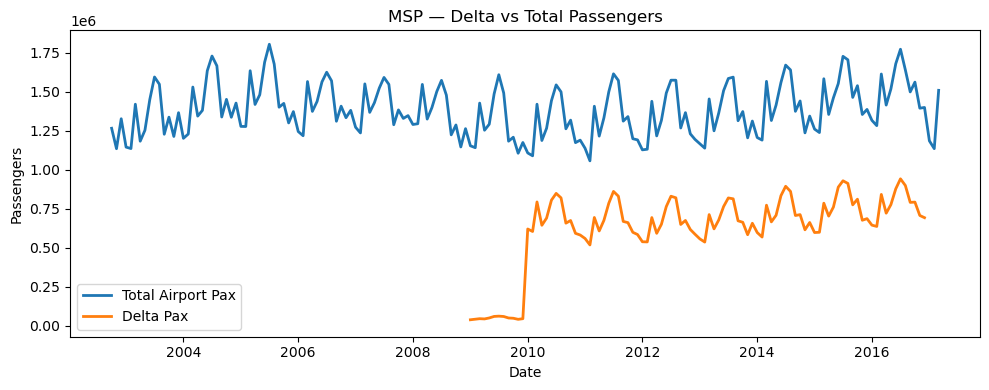

Saved: C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\images\msp\MSP_delta_vs_total.png


In [18]:
import matplotlib.pyplot as plt

for ap in ["ATL", "DTW", "MSP"]:
    df = market_data[ap]

    plt.figure(figsize=(10,4))
    plt.plot(df["date"], df["total_pax"], label="Total Airport Pax", linewidth=2)
    plt.plot(df["date"], df["delta_pax"], label="Delta Pax", linewidth=2)
    plt.title(f"{ap} — Delta vs Total Passengers")
    plt.ylabel("Passengers")
    plt.xlabel("Date")
    plt.legend()
    plt.tight_layout()

    out_path = IMAGES_DIR / ap.lower() / f"{ap}_delta_vs_total.png"
    plt.savefig(out_path, dpi=300)
    plt.show()

    print("Saved:", out_path)


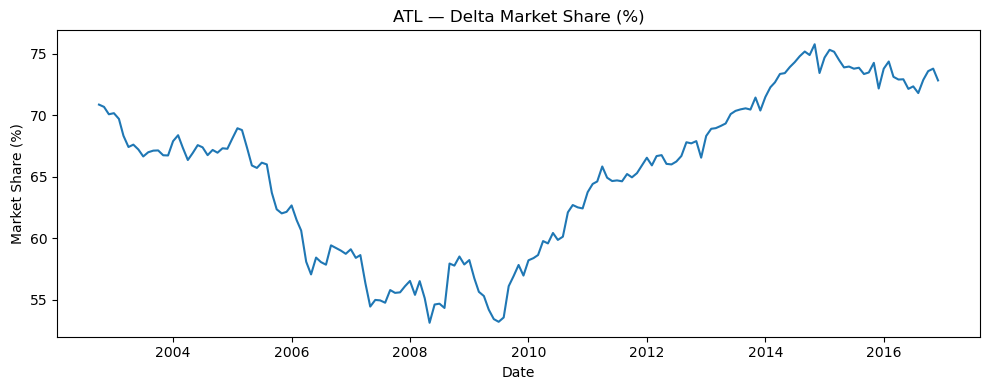

Saved: C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\images\atl\ATL_delta_market_share.png


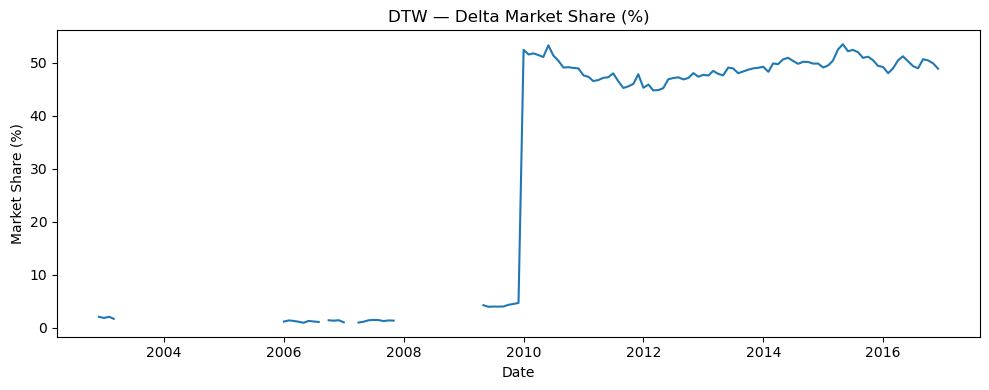

Saved: C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\images\dtw\DTW_delta_market_share.png


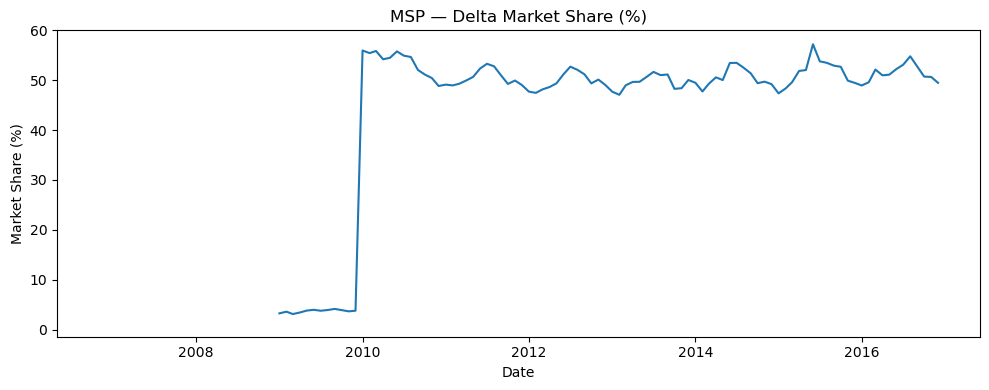

Saved: C:\Users\Seb\Documents\Portfolio (Projects)\Aviation_AI_Projects\Project_B_Delta_Airlines_Demand_Forecasting\images\msp\MSP_delta_market_share.png


In [19]:
for ap in ["ATL", "DTW", "MSP"]:
    df = market_data[ap]

    plt.figure(figsize=(10,4))
    plt.plot(df["date"], df["delta_share"])
    plt.title(f"{ap} — Delta Market Share (%)")
    plt.ylabel("Market Share (%)")
    plt.xlabel("Date")
    plt.tight_layout()

    out_path = IMAGES_DIR / ap.lower() / f"{ap}_delta_market_share.png"
    plt.savefig(out_path, dpi=300)
    plt.show()

    print("Saved:", out_path)
